In [1]:
# import the library
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
import xgboost

# increase dataframe max_row and column size for complete print of dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# dataset load and preprocessing

In [2]:
# read the dataset
df = pd.read_excel('output_South Australia.xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Earners (persons),Unnamed: 4,Unnamed: 5,Unnamed: 6,Median age of earners (years),Unnamed: 8,Unnamed: 9,Unnamed: 10,Sum ($),Unnamed: 12,Unnamed: 13,Unnamed: 14,Median ($),Unnamed: 16,Unnamed: 17,Unnamed: 18,Mean ($),Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,LGA,LGA NAME,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,40070,Adelaide,14031,12550,13088,13372,41,40,39,38,1060000000,971946451,1008798009,1050535805,48851,50161,50793,50706,75443,77446,77078,78562
3,1.0,40120,Adelaide Hills,24230,24419,24914,24483,48,48,48,48,1620000000,1679103047,1742210951,1768422693,49518,51706,52564,54358,66708,68762,69929,72231
4,2.0,40150,Adelaide Plains,5191,5000,4923,4909,43,45,45,45,267000000,272295822,272328163,270824300,43772,46240,48195,49885,51398,54459,55318,55169


In [4]:
# ignore 1st column as its useless
df = df.iloc[:,1:]

In [6]:
# consider first two column and last 4 mean column
col = list(df.loc[0])[:2] + list(df.loc[0])[-4:]

In [9]:
# rename the column name 
df.columns = df.iloc[0]

In [10]:
df.head()

,LGA,LGA NAME,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19
0,LGA,LGA NAME,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40070,Adelaide,14031,12550,13088,13372,41,40,39,38,1060000000,971946451,1008798009,1050535805,48851,50161,50793,50706,75443,77446,77078,78562
3,40120,Adelaide Hills,24230,24419,24914,24483,48,48,48,48,1620000000,1679103047,1742210951,1768422693,49518,51706,52564,54358,66708,68762,69929,72231
4,40150,Adelaide Plains,5191,5000,4923,4909,43,45,45,45,267000000,272295822,272328163,270824300,43772,46240,48195,49885,51398,54459,55318,55169


In [11]:
# ignore first 2 rows.
df = df[2:]

In [12]:
df.head()

,LGA,LGA NAME,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19
2,40070,Adelaide,14031,12550,13088,13372,41,40,39,38,1060000000,971946451,1008798009,1050535805,48851,50161,50793,50706,75443,77446,77078,78562
3,40120,Adelaide Hills,24230,24419,24914,24483,48,48,48,48,1620000000,1679103047,1742210951,1768422693,49518,51706,52564,54358,66708,68762,69929,72231
4,40150,Adelaide Plains,5191,5000,4923,4909,43,45,45,45,267000000,272295822,272328163,270824300,43772,46240,48195,49885,51398,54459,55318,55169
5,40220,Alexandrina,13293,13905,14251,14265,50,51,50,50,610000000,646475655,674172859,694421596,37647,37347,38502,40356,45859,46492,47307,48680
6,40250,Anangu Pitjantjatjara,169,148,190,295,41,38,36,38,7310883,6367150,7941843,14146408,25272,24617,26471,30835,43260,43021,41799,47954


In [13]:
# reset the index so that it can start with 0
df.reset_index(drop=True,inplace=True)

In [14]:
df.head()

,LGA,LGA NAME,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19,2015-16,2016-17,2017-18,2018-19
0,40070,Adelaide,14031,12550,13088,13372,41,40,39,38,1060000000,971946451,1008798009,1050535805,48851,50161,50793,50706,75443,77446,77078,78562
1,40120,Adelaide Hills,24230,24419,24914,24483,48,48,48,48,1620000000,1679103047,1742210951,1768422693,49518,51706,52564,54358,66708,68762,69929,72231
2,40150,Adelaide Plains,5191,5000,4923,4909,43,45,45,45,267000000,272295822,272328163,270824300,43772,46240,48195,49885,51398,54459,55318,55169
3,40220,Alexandrina,13293,13905,14251,14265,50,51,50,50,610000000,646475655,674172859,694421596,37647,37347,38502,40356,45859,46492,47307,48680
4,40250,Anangu Pitjantjatjara,169,148,190,295,41,38,36,38,7310883,6367150,7941843,14146408,25272,24617,26471,30835,43260,43021,41799,47954


In [15]:
x = df[['LGA','LGA NAME']]

In [19]:
x.head()

,LGA,LGA NAME
0,40070,Adelaide
1,40120,Adelaide Hills
2,40150,Adelaide Plains
3,40220,Alexandrina
4,40250,Anangu Pitjantjatjara


In [16]:
# store mean columns values
y = df.iloc[:,-4:]

In [20]:
y.head()

,2015-16,2016-17,2017-18,2018-19
0,75443,77446,77078,78562
1,66708,68762,69929,72231
2,51398,54459,55318,55169
3,45859,46492,47307,48680
4,43260,43021,41799,47954


In [21]:
# join x and y and create a new dataframe called df
df = pd.concat([x,y],axis=1)

In [22]:
# assign new column name
df.columns = ['LGA','LGA NAME','Mean_2015-16','Mean_2016-17','Mean_2017-18','Mean_2018-19']

In [23]:
df.head()

,LGA,LGA NAME,Mean_2015-16,Mean_2016-17,Mean_2017-18,Mean_2018-19
0,40070,Adelaide,75443,77446,77078,78562
1,40120,Adelaide Hills,66708,68762,69929,72231
2,40150,Adelaide Plains,51398,54459,55318,55169
3,40220,Alexandrina,45859,46492,47307,48680
4,40250,Anangu Pitjantjatjara,43260,43021,41799,47954


In [24]:
# feature is Mean_2015-16, Mean_2016-17 and Mean_2017-18
# which is 2nd, 3rd and 4th columns
X = df.iloc[:,[2,3,4]]

# target is Mean_2018-19
y = df[['Mean_2018-19']]

In [25]:
X

,Mean_2015-16,Mean_2016-17,Mean_2017-18
0,75443,77446,77078
1,66708,68762,69929
2,51398,54459,55318
3,45859,46492,47307
4,43260,43021,41799
5,52936,54897,55910
6,54753,62212,54398
7,46579,47567,48161
8,84542,84701,86703
9,53879,54792,55810


In [26]:
y

,Mean_2018-19
0,78562
1,72231
2,55169
3,48680
4,47954
5,56892
6,54762
7,50633
8,90816
9,57545


In [27]:
# data normalization i.e. scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Build base xgboost Model

In [28]:
# build the model
xgb_model = xgboost.XGBRegressor()

# train the model
xgb_model.fit(X,y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
# perform the prediction
pred = xgb_model.predict(X)

# optimization

In [30]:
# parameters

parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[1000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
}

# apply grid search
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1, verbose=3,scoring='neg_mean_squared_error')
gsearch1.fit(X,y.values)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
best params
{'gamma': 0.1, 'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 1000, 'reg_alpha': 0.75, 'reg_lambda': 1e-05}
best score
-31323474.94631092


In [19]:
# store best parameters
opt_parameters = gsearch1.best_params_

# Build optimal xgboost Model

In [20]:
clf_sw = xgboost.XGBRegressor()

#set optimal parameters
clf_sw.set_params(**opt_parameters)

# train and predict
clf_sw.fit(X, y.values)
y_pred = clf_sw.predict(X)

In [21]:
y_pred

array([ 78562.01 ,  72230.74 ,  55169.05 ,  48680.098,  47953.547,
        56892.043,  54761.86 ,  50632.938,  90815.96 ,  57544.863,
        57100.098,  59455.668,  53969.9  ,  48464.086,  50308.637,
        49281.316,  57261.914,  53620.785,  53075.58 ,  55799.266,
        44462.047,  60021.355,  72032.12 ,  47553.984,  29614.697,
        54903.254,  59669.867,  58152.61 ,  65344.73 ,  49597.094,
        57774.855,  57832.277,  44787.06 ,  71283.96 ,  60055.492,
        54714.023,  46554.848,  46517.848,  56961.848,  51657.12 ,
        74405.04 ,  54394.953,  42134.367,  43610.156,  50472.07 ,
        55332.812,  60377.117,  56157.242,  54183.79 ,  69993.984,
        49708.914,  56955.2  ,  99193.95 ,  51279.97 ,  50931.97 ,
        53503.277,  56730.203,  57530.82 ,  49164.242,  57573.703,
        85140.98 ,  45760.816,  49741.535, 110537.125,  56512.816,
        58596.266,  63525.992,  51854.098,  46464.168,  51158.105,
        54789.285], dtype=float32)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y, pred) # before optimization

2.543261514583104

In [24]:
mean_squared_error(y, y_pred)  # after optimization

0.22367799785775197

# predict for 2019_2020

- use Mean_2016-17	, Mean_2017-18	and Mean_2018-19 and predict for 2019_2020

In [25]:
# get Mean_2016-17 , Mean_2017-18 and Mean_2018-19
X = df.iloc[:,[3,4,5]]

In [26]:
# data normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
# prediction
pred_Mean_2019_2020 = clf_sw.predict(X)

In [28]:
# store predicted data
df['Mean_2019-2020'] = pred_Mean_2019_2020

# predict for 2020_2021

- use Mean_2017-18 , Mean_2018-19 ,2019_2020 and predict for Mean_2020-2021

In [29]:
X = df.iloc[:,-3:]

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [31]:
pred_Mean_2020_2021 = clf_sw.predict(X)

In [32]:
df['Mean_2020-2021'] = pred_Mean_2020_2021

# predict for 2021_2022

- use Mean_2018-19 ,2019_2020 ,Mean_2020-2021 and predict for 2021_2022

In [33]:
X = df.iloc[:,-3:]

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
pred_Mean_2021_2022 = clf_sw.predict(X)

In [36]:
df['Mean_2021-2022'] = pred_Mean_2021_2022

In [37]:
df

,LGA,LGA NAME,Mean_2015-16,Mean_2016-17,Mean_2017-18,Mean_2018-19,Mean_2019-2020,Mean_2020-2021,Mean_2021-2022
0,40070,Adelaide,75443,77446,77078,78562,85140.976562,78562.007812,78562.007812
1,40120,Adelaide Hills,66708,68762,69929,72231,72032.117188,72230.742188,74206.632812
2,40150,Adelaide Plains,51398,54459,55318,55169,54632.214844,50227.074219,53929.574219
3,40220,Alexandrina,45859,46492,47307,48680,54655.765625,51779.171875,53857.230469
4,40250,Anangu Pitjantjatjara,43260,43021,41799,47954,47584.066406,51866.953125,49709.335938
5,40310,Barossa,52936,54897,55910,56892,58791.601562,56609.171875,56170.691406
6,40430,Barunga West,54753,62212,54398,54762,47117.945312,52545.910156,51380.566406
7,40520,Berri and Barmera,46579,47567,48161,50633,55019.531250,52762.996094,51816.800781
8,40700,Burnside,84542,84701,86703,90816,99193.953125,90815.960938,99193.953125
9,40910,Campbelltown,53879,54792,55810,57545,58837.285156,56252.492188,54973.527344


# Plot

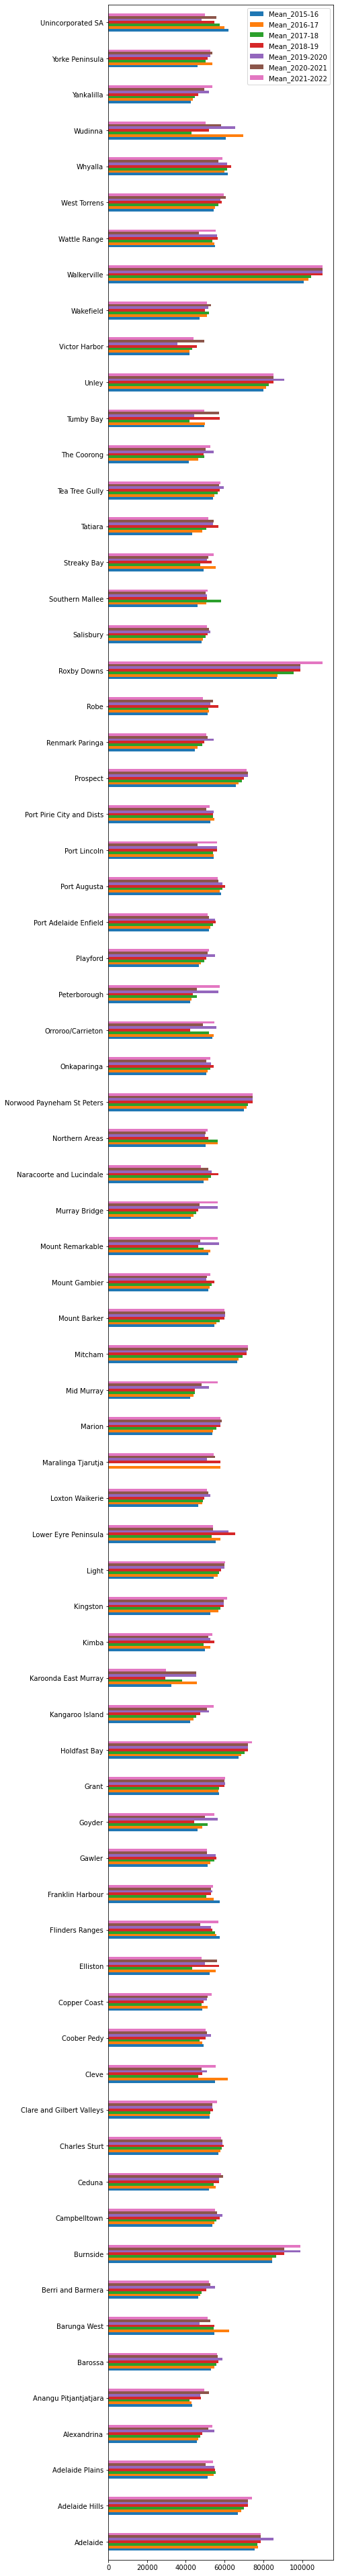

In [38]:
# create a subplot
fig, ax = plt.subplots()

# store lga name
people = df['LGA NAME']

# remove LGA and plot the graph
df.drop('LGA',axis=1).plot.barh(figsize=(6,70),ax=ax)

# set y-tick as LGA names
ax.set_yticklabels(people)

# show the plot
plt.show()